<a href="https://colab.research.google.com/github/MahankaliShruthi/Keras-RockPaperScissors/blob/main/Rock_paper_scissors_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /content/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /content/rps-test-set.zip

--2019-07-01 04:02:50--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 2404:6800:4003:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/content/rps.zip’

/content/rps.zip    100%[===================>] 191.38M   113MB/s    in 1.7s    

2019-07-01 04:02:52 (113 MB/s) - ‘/content/rps.zip’ saved [200682221/200682221]

--2019-07-01 04:02:54--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 2404:6800:4003:c02::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/content/rps-test-set.zip’

In [ ]:
import os
import zipfile

local_zip = '/content/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

local_zip = '/content/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

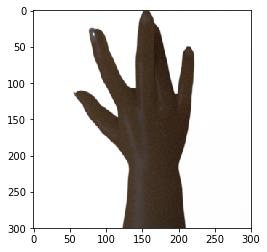

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
plt.imshow(mpimg.imread('/content/rps/paper/paper02-000.png'))

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
model = tf.keras.models.Sequential([Conv2D(16, (5, 5), activation='relu', input_shape=(224, 224, 3)), 
                                    MaxPooling2D(2, 2), 
                                    Conv2D(32, (5, 5), activation='relu'), 
                                    MaxPooling2D(2, 2),
                                    Conv2D(64, (5, 5), activation='relu'), 
                                    MaxPooling2D(2, 2),
                                    Conv2D(128, (5, 5), activation='relu'), 
                                    MaxPooling2D(2, 2),
                                    Conv2D(256, (5, 5), activation='relu'), 
                                    MaxPooling2D(2, 2),
                                    Flatten(),
                                    Dense(512, activation='relu'),
                                    Dense(128, activation='relu'),
                                    Dense(32, activation='relu'),
                                    Dense(8, activation='relu'),
                                    Dense(3, activation='softmax')])

W0701 04:17:39.827782 140367596046208 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 106, 106, 32)      12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 49, 49, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 128)       2

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['acc'])

In [ ]:
from keras_preprocessing.image import ImageDataGenerator
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	'/content/rps',
	target_size=(224,224),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	'/content/rps-test-set',
	target_size=(224,224),
	class_mode='categorical'
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
history = model.fit_generator(train_generator, 
                              epochs=10, 
                              validation_data = validation_generator, 
                              verbose = 1)

Epoch 1/10
79/79 [==============================] - 36s 452ms/step - loss: 1.0986 - acc: 0.3290 - val_loss: 1.0986 - val_acc: 0.3333
Epoch 2/10
79/79 [==============================] - 33s 422ms/step - loss: 1.0986 - acc: 0.3333 - val_loss: 1.0986 - val_acc: 0.3333
Epoch 3/10
79/79 [==============================] - 33s 424ms/step - loss: 1.0986 - acc: 0.3187 - val_loss: 1.0986 - val_acc: 0.3333
Epoch 4/10
79/79 [==============================] - 33s 420ms/step - loss: 1.0986 - acc: 0.3254 - val_loss: 1.0986 - val_acc: 0.3333
Epoch 5/10
79/79 [==============================] - 34s 431ms/step - loss: 1.0986 - acc: 0.3274 - val_loss: 1.0986 - val_acc: 0.3333
Epoch 6/10
79/79 [==============================] - 33s 423ms/step - loss: 1.0986 - acc: 0.3230 - val_loss: 1.0986 - val_acc: 0.3333
Epoch 7/10
79/79 [==============================] - 34s 428ms/step - loss: 1.0986 - acc: 0.3155 - val_loss: 1.0986 - val_acc: 0.3333
Epoch 8/10
79/79 [==============================] - 33s 423ms/step - 

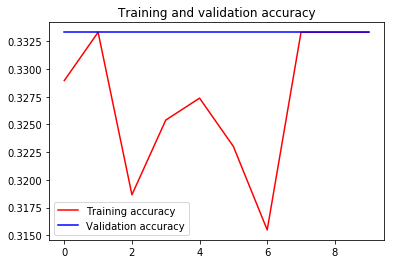

<Figure size 432x288 with 0 Axes>

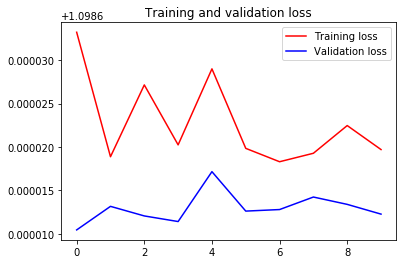

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()